In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts
from pickle import dump

import keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

import pickle

In [3]:
url= "https://raw.githubusercontent.com/kxerxess/Diabetes-Prediction/master/data/diabetes-FINAL.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,...,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,...,0,0,0,1,1,0,1176.0,0.120000,0.294985,0
1,1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,...,0,1,0,1,1,1,771.4,0.032258,0.302439,1
2,2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,...,0,0,0,1,1,0,745.6,0.250000,0.188791,1
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,...,0,1,0,1,1,1,646.3,0.047619,0.223404,1
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,...,0,0,0,1,1,0,1508.5,0.000000,0.196429,0


In [4]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('DiabetesPedigreeFunction', axis=1)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome,F0,F1,...,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,6,148.0,72.0,35.0,169.5,33.6,50,1,0,0,...,0,0,0,1,1,0,1176.0,0.120000,0.294985,0
1,1,85.0,66.0,29.0,102.5,26.6,31,0,0,1,...,0,1,0,1,1,1,771.4,0.032258,0.302439,1
2,8,183.0,64.0,32.0,169.5,23.3,32,1,0,1,...,0,0,0,1,1,0,745.6,0.250000,0.188791,1
3,1,89.0,66.0,23.0,94.0,28.1,21,0,1,1,...,0,1,0,1,1,1,646.3,0.047619,0.223404,1
4,0,137.0,40.0,35.0,168.0,43.1,33,1,0,0,...,0,0,0,1,1,0,1508.5,0.000000,0.196429,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    float64
 2   BloodPressure  768 non-null    float64
 3   SkinThickness  768 non-null    float64
 4   Insulin        768 non-null    float64
 5   BMI            768 non-null    float64
 6   Age            768 non-null    int64  
 7   Outcome        768 non-null    int64  
 8   F0             768 non-null    int64  
 9   F1             768 non-null    int64  
 10  F2             768 non-null    int64  
 11  F3             768 non-null    int64  
 12  F4             768 non-null    int64  
 13  F5             768 non-null    int64  
 14  F6             768 non-null    int64  
 15  F7             768 non-null    int64  
 16  F8             768 non-null    int64  
 17  F9             768 non-null    int64  
 18  F10       

In [7]:
columns = df.columns
print(columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome', 'F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7',
       'F8', 'F9', 'F10', 'F11', 'F12', 'F13'],
      dtype='object')


In [8]:
cat_feat = df.loc[:, ['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F13']]
cat_feat

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F13
0,0,0,0,0,0,0,0,1,1,0,0
1,0,1,0,1,0,1,0,1,1,1,1
2,0,1,0,0,0,0,0,1,1,0,1
3,1,1,1,1,0,1,0,1,1,1,1
4,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,1,0,0,0,1,1,0,0
764,0,0,1,0,0,0,0,1,1,1,1
765,0,1,1,0,0,0,0,1,1,0,1
766,0,0,0,0,0,0,0,1,1,1,1


In [9]:
num_feat = df.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'F10', 'F11', 'F12']]
num_feat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,F10,F11,F12
0,6,148.0,72.0,35.0,169.5,33.6,50,1176.0,0.120000,0.294985
1,1,85.0,66.0,29.0,102.5,26.6,31,771.4,0.032258,0.302439
2,8,183.0,64.0,32.0,169.5,23.3,32,745.6,0.250000,0.188791
3,1,89.0,66.0,23.0,94.0,28.1,21,646.3,0.047619,0.223404
4,0,137.0,40.0,35.0,168.0,43.1,33,1508.5,0.000000,0.196429
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,63,1579.2,0.158730,0.350000
764,2,122.0,70.0,27.0,102.5,36.8,27,993.6,0.074074,0.263415
765,5,121.0,72.0,23.0,112.0,26.2,30,602.6,0.166667,0.267857
766,1,126.0,60.0,32.0,169.5,30.1,47,963.2,0.021277,0.277286


In [10]:
target_var = df.loc[:, ['Outcome']]
target_var

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [11]:
num_feat_arr = num_feat.values
num_feat_col = num_feat.columns

In [12]:
sc=StandardScaler()
num_feat_arr_sc=sc.fit_transform(num_feat_arr)

In [13]:
num_feat_arr_sc.shape

(768, 10)

In [14]:
num_feat = pd.DataFrame(data=num_feat_arr_sc, columns=num_feat_col)
num_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,F10,F11,F12
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,1.425995,0.436284,0.144246,-0.023905
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.190672,-0.455696,-0.929227,0.014204
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,-0.105584,-0.512575,1.734723,-0.566853
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-1.041549,-0.731491,-0.741294,-0.389882
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,-0.020496,1.169312,-1.323886,-0.527802


In [15]:
cat_feat.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F13
0,0,0,0,0,0,0,0,1,1,0,0
1,0,1,0,1,0,1,0,1,1,1,1
2,0,1,0,0,0,0,0,1,1,0,1
3,1,1,1,1,0,1,0,1,1,1,1
4,0,0,0,0,0,0,0,1,1,0,0


In [16]:
input_data = num_feat.merge(cat_feat ,left_index=True , right_index=True, how = "left")
input_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,F10,F11,F12,...,F1,F2,F3,F4,F5,F6,F7,F8,F9,F13
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,1.425995,0.436284,0.144246,-0.023905,...,0,0,0,0,0,0,1,1,0,0
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.190672,-0.455696,-0.929227,0.014204,...,1,0,1,0,1,0,1,1,1,1
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,-0.105584,-0.512575,1.734723,-0.566853,...,1,0,0,0,0,0,1,1,0,1
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-1.041549,-0.731491,-0.741294,-0.389882,...,1,1,1,0,1,0,1,1,1,1
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,-0.020496,1.169312,-1.323886,-0.527802,...,0,0,0,0,0,0,1,1,0,0


In [17]:
input_data.shape

(768, 21)

In [18]:
output_data = target_var.copy()
output_data.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [19]:
X = input_data.values
y = output_data.values
print(X.shape, y.shape)

(768, 21) (768, 1)


In [20]:
np.sum(y)

268

In [21]:
differ=[]
for i in range(1000):
    xTrain,xTest,yTrain,yTest=tts(X, y, test_size=0.2, random_state=i)
    count_1 = np.sum(yTrain)
    count_0 = len(yTrain)-count_1
    diff = abs(count_0-count_1)
    differ.append(diff)
print(min(differ), differ.index(min(differ)))

154 395


In [22]:
xTrain,xTest,yTrain,yTest=tts(X, y, test_size=0.2, random_state=154)

In [23]:
count_1 = np.sum(yTrain)
count_0 = len(yTrain)-count_1
diff = print(count_0-count_1)

206


In [24]:
count_1

204

In [25]:
#dump(sc, open('scaler.pkl', 'wb'))

In [26]:
model_template = keras.models.load_model('./hybrid_100+200ep_32bs_89acc_BEST2_RS154')

In [27]:
model_template.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 128)               2816      
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_37 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_38 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 32)              

In [28]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(21,)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history=model.fit(xTrain, yTrain, epochs=200, batch_size=16)

Epoch 1/200
39/39 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.6433
Epoch 2/200
39/39 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7199
Epoch 3/200
39/39 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7704
Epoch 4/200
39/39 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.7720
Epoch 5/200
39/39 [==============================] - 0s 3ms/step - loss: 0.4606 - accuracy: 0.7948
Epoch 6/200
39/39 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7964
Epoch 7/200
39/39 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7801
Epoch 8/200
39/39 [==============================] - 0s 3ms/step - loss: 0.4445 - accuracy: 0.8013
Epoch 9/200
39/39 [==============================] - 0s 4ms/step - loss: 0.4229 - accuracy: 0.8371
Epoch 10/200
39/39 [==============================] - 0s 3ms/step - loss: 0.4565 - accuracy: 0.8078
Epoch 11/

39/39 [==============================] - 0s 3ms/step - loss: 0.2428 - accuracy: 0.9153
Epoch 84/200
39/39 [==============================] - 0s 3ms/step - loss: 0.2722 - accuracy: 0.8909
Epoch 85/200
39/39 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.9088
Epoch 86/200
39/39 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.9039
Epoch 87/200
39/39 [==============================] - 0s 3ms/step - loss: 0.2525 - accuracy: 0.9137
Epoch 88/200
39/39 [==============================] - 0s 2ms/step - loss: 0.2616 - accuracy: 0.9121
Epoch 89/200
39/39 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.9023
Epoch 90/200
39/39 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.8974
Epoch 91/200
39/39 [==============================] - 0s 3ms/step - loss: 0.2674 - accuracy: 0.9088
Epoch 92/200
39/39 [==============================] - 0s 3ms/step - loss: 0.2834 - accuracy: 0.8958
Epoch 93/200


In [30]:
pred = model.predict(xTest)
pred_bn=(pred>0.5)

In [31]:
print(classification_report(yTest,pred_bn))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        90
           1       0.95      0.81      0.87        64

    accuracy                           0.90       154
   macro avg       0.91      0.89      0.90       154
weighted avg       0.91      0.90      0.90       154



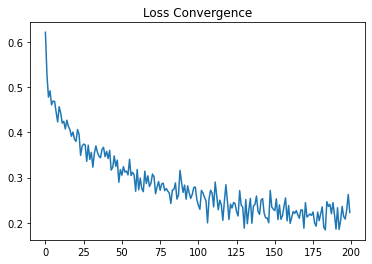

In [32]:
plt.plot(history.history['loss'])
plt.title('Loss Convergence')
plt.show()

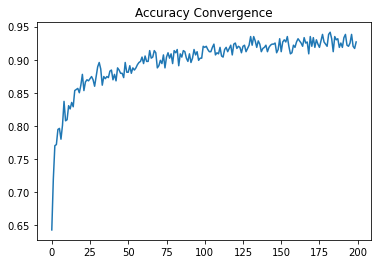

In [33]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy Convergence')
plt.show()

In [42]:
model.save('TF_128x128x32x32_bs16_rms_200e_rs154_acc90.h5')